In [51]:
pip install wordcloud


[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



     -------------------------------------- 300.2/300.2 kB 9.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from wordcloud import WordCloud
import re

## Lectura del archivo

In [4]:
file_path = "data/Films.xlsx"

xls = pd.ExcelFile(file_path, engine='openpyxl')

## Film analysis

In [76]:
df = pd.read_excel(xls, sheet_name=1)

df.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,num_voted_users,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientis...,2006,1,NULL,6,0.99,86,20.99,76750,PG,Deleted Scenes,2020-01-25 14:40:46
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administra...,2006,1,NULL,3,4.99,48,12.99,19350,G,Trailers,2020-01-25 14:40:46
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a...,2006,1,NULL,7,2.99,50,18.99,20700,NC-17,Trailers,2020-01-25 14:40:46
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lum...,x2006,1,NULL,5,2.99,117,26.99,45500,G,Commentaries,2020-01-25 14:40:46
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And...,2006,1,NULL,6,2.99,130,22.99,11300,G,Deleted Scenes,2020-01-25 14:40:46


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   film_id                1003 non-null   object
 1    title                 1003 non-null   object
 2    description           1003 non-null   object
 3    release_year          1003 non-null   object
 4    language_id           1003 non-null   int64 
 5    original_language_id  1003 non-null   object
 6    rental_duration       1003 non-null   int64 
 7    rental_rate           1003 non-null   object
 8    length                1003 non-null   object
 9    replacement_cost      1003 non-null   object
 10   num_voted_users       1003 non-null   object
 11   rating                1003 non-null   object
 12   special_features      1003 non-null   object
 13  last_update            1003 non-null   object
dtypes: int64(2), object(12)
memory usage: 109.8+ KB


In [78]:
df.columns

Index(['film_id', ' title', ' description', ' release_year', ' language_id',
       ' original_language_id', ' rental_duration', ' rental_rate', ' length',
       ' replacement_cost', ' num_voted_users', ' rating', ' special_features',
       'last_update'],
      dtype='object')

In [79]:
df = df.rename(columns={' title': 'title', 
                        ' description':'description', 
                        ' release_year':'release_year', 
                        ' language_id':'language_id', 
                        ' original_language_id':'original_language_id',
                        ' rental_duration':'rental_duration',
                        ' rental_rate':'rental_rate',
                        ' length':'length',
                        ' replacement_cost':'replacement_cost',
                        ' num_voted_users':'num_voted_users',
                        ' rating':'rating',
                        ' special_features':'special_features'
                        })


# Listar columnas categóricas id a convertir
id_columns = ['film_id', 'title', 'description', 'language_id', 'original_language_id',
              'rating', 'special_features']

# Convertir columnas id a tipo categórico
for col in id_columns:
    df[col] = df[col].replace('NULL', np.nan, regex=True)
    df[col] = df[col].astype('category')


# Lista de columnas numéricas
numeric_columns = ['release_year', 'rental_duration', 'rental_rate', 'length',
                   'replacement_cost', 'num_voted_users']

# Limpiar y convertir las columnas numéricas
for col in numeric_columns:
    # Convertir a string para aplicar expresiones regulares
    df[col] = df[col].astype(str)
    
    # Eliminar caracteres no numéricos (excepto punto decimal)
    df[col] = df[col].str.replace(r'[^0-9.-]', '', regex=True)
    df[col] = df[col].replace('NULL', np.nan)
    # Convertir a tipo numérico (float o int)
    df[col] = pd.to_numeric(df[col], errors='coerce')


C:\Users\Usuario\AppData\Local\Temp\ipykernel_11896\2751283383.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace('NULL', np.nan, regex=True)


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   film_id               1003 non-null   category
 1   title                 1003 non-null   category
 2   description           1003 non-null   category
 3   release_year          1003 non-null   int64   
 4   language_id           1003 non-null   category
 5   original_language_id  0 non-null      category
 6   rental_duration       1003 non-null   int64   
 7   rental_rate           1003 non-null   float64 
 8   length                1003 non-null   int64   
 9   replacement_cost      1003 non-null   float64 
 10  num_voted_users       1003 non-null   int64   
 11  rating                1003 non-null   category
 12  special_features      1003 non-null   category
 13  last_update           1003 non-null   object  
dtypes: category(7), float64(2), int64(4), object(1)
memory u

In [81]:
df.isnull().sum()

film_id                    0
title                      0
description                0
release_year               0
language_id                0
original_language_id    1003
rental_duration            0
rental_rate                0
length                     0
replacement_cost           0
num_voted_users            0
rating                     0
special_features           0
last_update                0
dtype: int64

In [ ]:
df.drop(columns='original_language_id')

In [82]:
df.duplicated().sum()

3

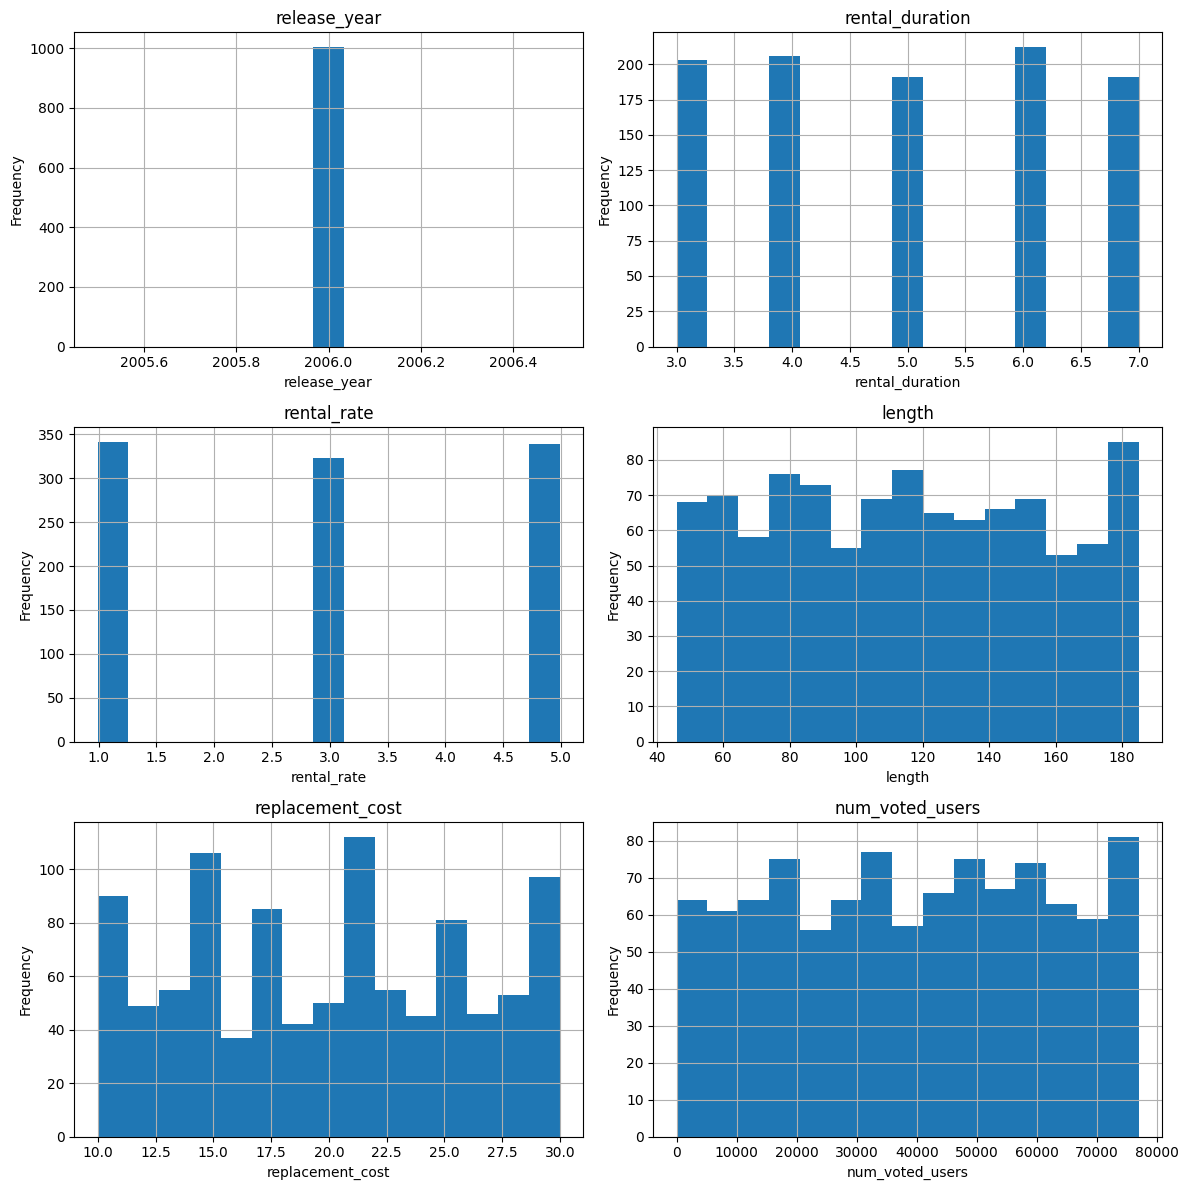

In [70]:
# Obtener las columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Definir el número de filas para ajustar la cantidad de gráficos (2 columnas)
n_cols = 2
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Calcula las filas necesarias

# Crear la figura y los ejes para los gráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 4))  # Ajustar tamaño

# Iterar sobre cada columna numérica y generar un histograma
for i, col in enumerate(numeric_cols):
    ax = axes[i // n_cols, i % n_cols]  # Asignar posición del gráfico
    df[col].plot(kind='hist', bins=15, ax=ax, title=col)
    ax.set_xlabel(col)  # Etiqueta para el eje x
    ax.set_ylabel('Frequency')  # Etiqueta para el eje y
    ax.grid(True)  # Añadir una cuadrícula

# Eliminar cualquier gráfico vacío si hay más subplots que columnas numéricas
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

plt.tight_layout()  # Ajustar el espaciado
plt.show()

In [84]:
# Obtener las columnas categóricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['film_id', 'title', 'description', 'language_id',
       'original_language_id', 'rating', 'special_features', 'last_update'],
      dtype='object')

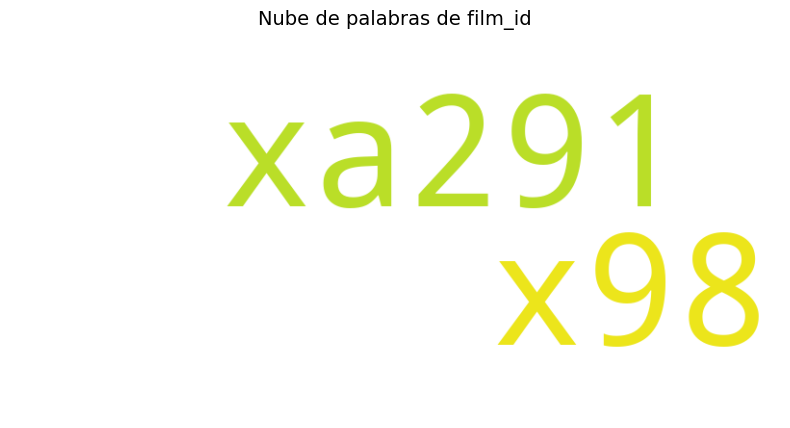

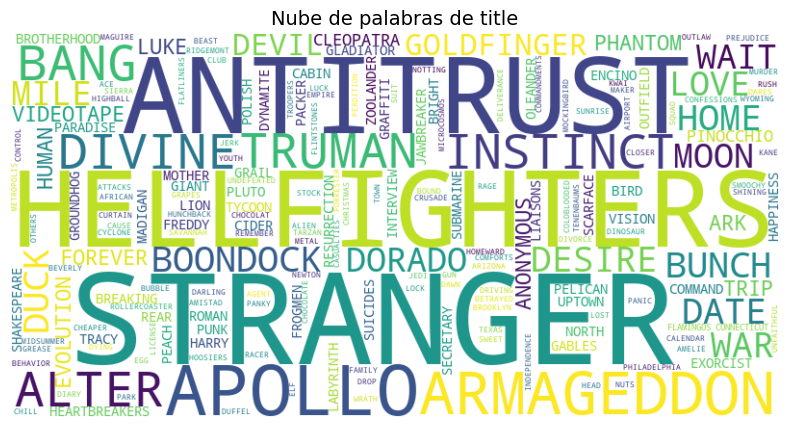

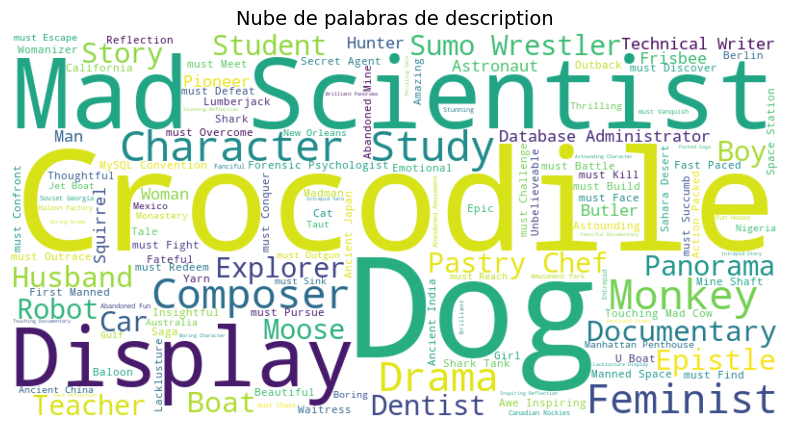

No se pudo generar una nube de palabras para language_id: We need at least 1 word to plot a word cloud, got 0.


<Figure size 1000x500 with 0 Axes>

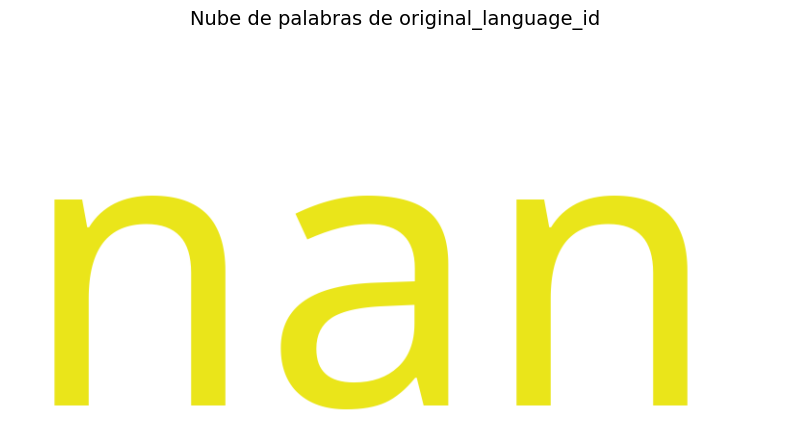

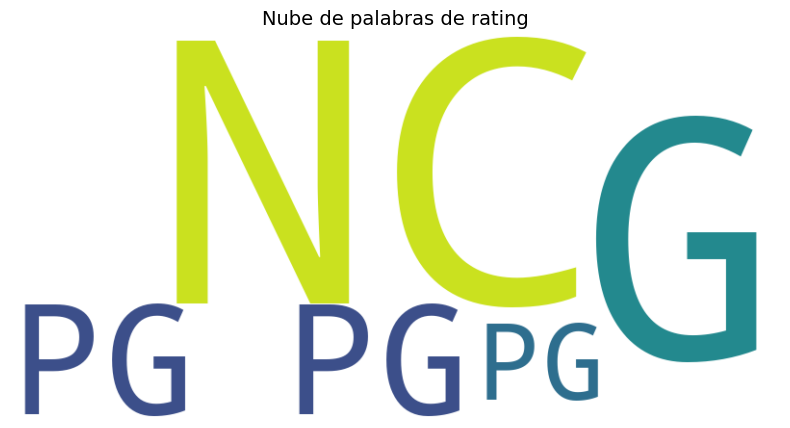

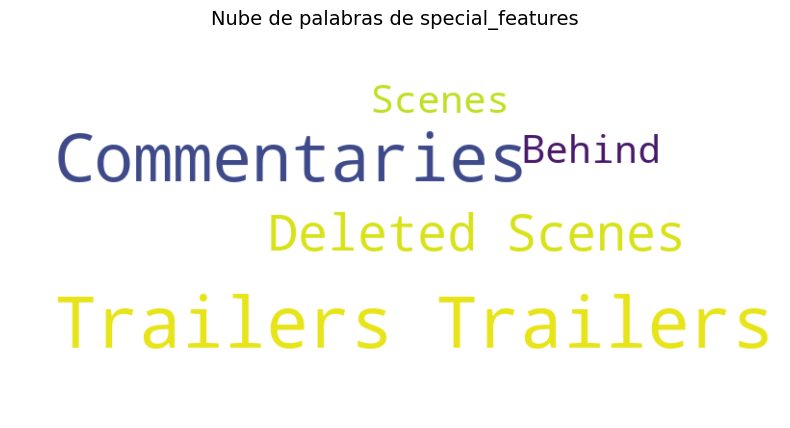

No se pudo generar una nube de palabras para last_update: We need at least 1 word to plot a word cloud, got 0.


<Figure size 1000x500 with 0 Axes>

In [85]:
# Obtener las columnas categóricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Iterar sobre cada columna categórica y generar una nube de palabras
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    
    # Crear un string único con todas las categorías concatenadas, separadas por espacios
    text = ' '.join(df[col].astype(str))
    
    # Generar la nube de palabras
    try:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        # Mostrar la nube de palabras
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')  # Ocultar los ejes
        plt.title(f'Nube de palabras de {col}', fontsize=14)
        plt.show()
    except ValueError as e:
        print(f'No se pudo generar una nube de palabras para {col}: {str(e)}')
    
    

In [89]:

df['film_id'] = df['film_id'].apply(lambda x: x if pd.api.types.is_numeric_dtype(x) else re.sub(r'[^0-9]', '', str(x)))


In [90]:

plt.figure(figsize=(10, 5))

# Crear un string único con todas las categorías concatenadas, separadas por espacios
text = ' '.join(df['film_id'].astype(str))

# Generar la nube de palabras
try:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Mostrar la nube de palabras
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Ocultar los ejes
    plt.title(f'Nube de palabras de film_id', fontsize=14)
    plt.show()
except ValueError as e:
    print(f'No se pudo generar una nube de palabras para film_id: {str(e)}')
    
    

No se pudo generar una nube de palabras para film_id: We need at least 1 word to plot a word cloud, got 0.


<Figure size 1000x500 with 0 Axes>

In [95]:
df[df['film_id'] == '98']

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,num_voted_users,rating,special_features,last_update
97,98,BRIGHT ENCOUNTERS,A Fateful Yarn of a Lumberjack And a Feminist...,2006,1,NaN,4,4.99,73,12.99,56700,PG-13,Trailers,2020-01-25 14:40:46


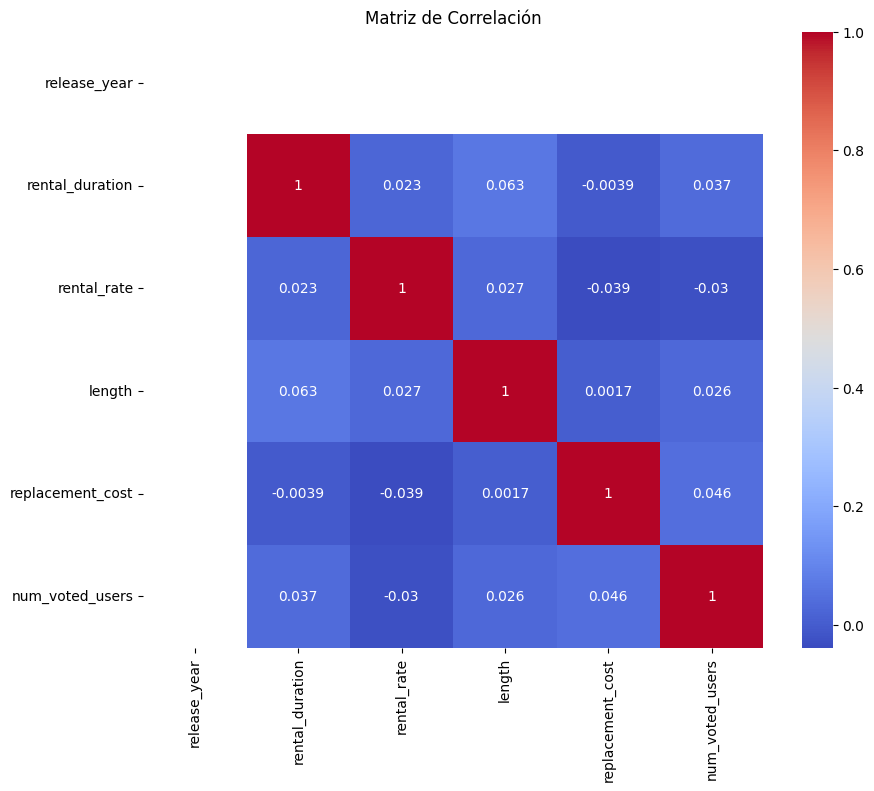

In [96]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sn.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

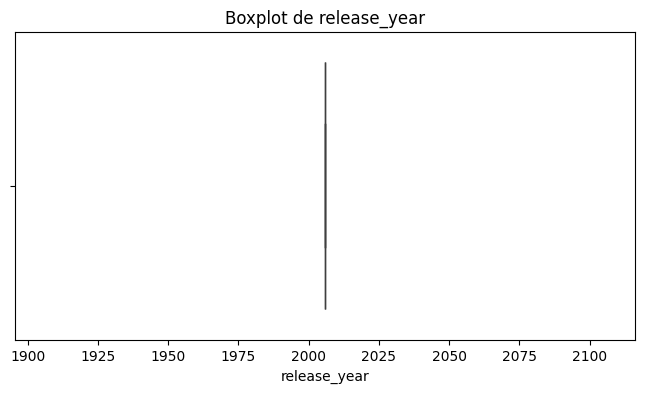

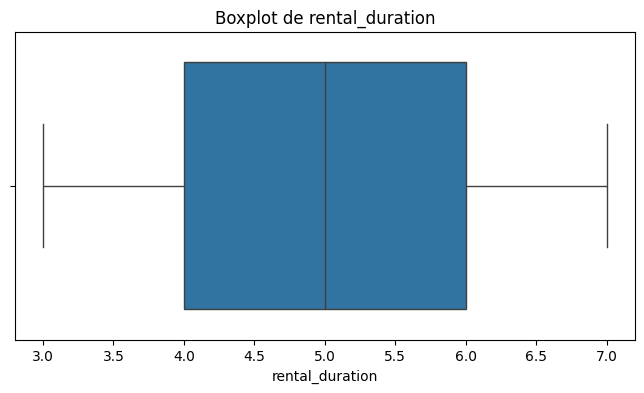

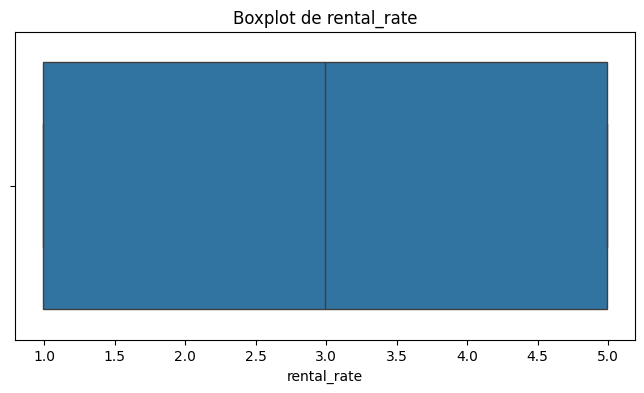

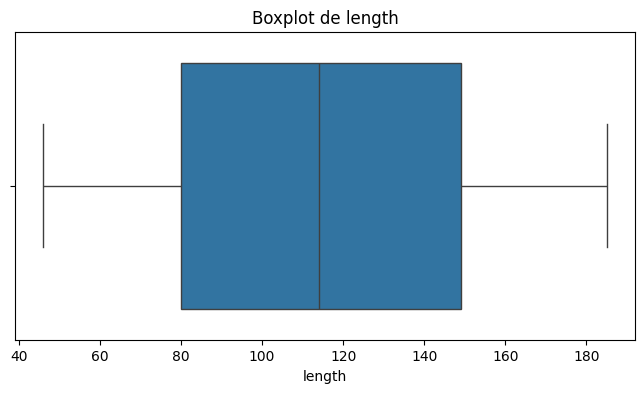

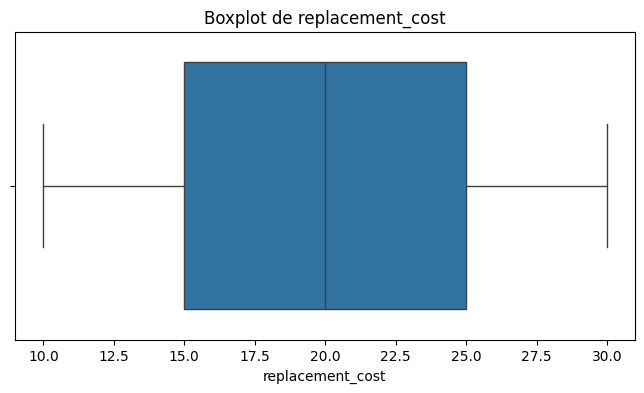

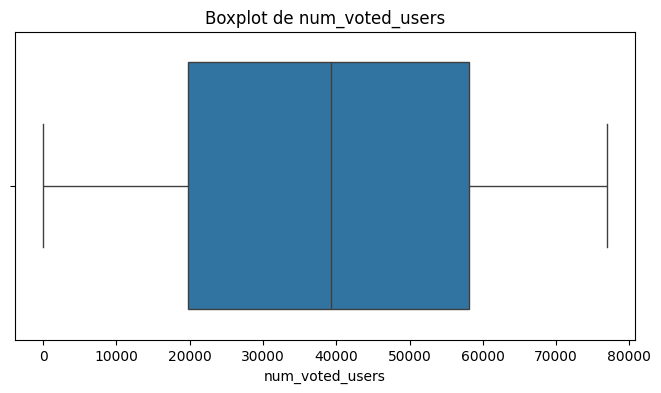

In [97]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sn.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

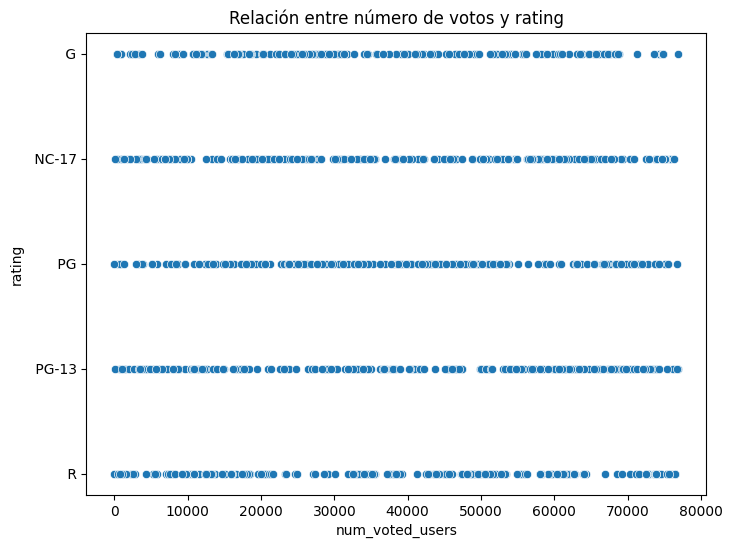

In [98]:
plt.figure(figsize=(8, 6))
sn.scatterplot(data=df, x='num_voted_users', y='rating')
plt.title('Relación entre número de votos y rating')
plt.show()

In [102]:
df['last_update'] = pd.to_datetime(df['last_update'], errors='coerce')

# Verificar si hay fechas mal formateadas (NaT)
invalid_dates = df[df['last_update'].isna()]

if invalid_dates.empty:
    print("Todas las fechas en 'last_update' están bien formateadas.")
else:
    print(f"Se encontraron {len(invalid_dates)} fechas mal formateadas:")
    print(invalid_dates)

Todas las fechas en 'last_update' están bien formateadas.


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   film_id               1003 non-null   category      
 1   title                 1003 non-null   category      
 2   description           1003 non-null   category      
 3   release_year          1003 non-null   int64         
 4   language_id           1003 non-null   category      
 5   original_language_id  0 non-null      category      
 6   rental_duration       1003 non-null   int64         
 7   rental_rate           1003 non-null   float64       
 8   length                1003 non-null   int64         
 9   replacement_cost      1003 non-null   float64       
 10  num_voted_users       1003 non-null   int64         
 11  rating                1003 non-null   category      
 12  special_features      1003 non-null   category      
 13  last_update       

## Inventory

In [105]:
df_inventory = pd.read_excel(xls, sheet_name=2)

df_inventory.head()

,inventory_id,film_id,store_id,last_update
0,1,1,1,2006-02-15 05:09:17
1,2,1,1,2006-02-15 05:09:17
2,3,1,1,2006-02-15 05:09:17
3,4,1,1,2006-02-15 05:09:17
4,5,1,2,2006-02-15 05:09:17


In [106]:
df_inventory.columns

Index(['inventory_id', 'film_id', ' store_id', ' last_update'], dtype='object')

In [107]:
df_inventory = df_inventory.rename(columns={' store_id': 'store_id', 
                        ' last_update':'last_update'
                        })



In [108]:
# Seleccionar las columnas que deberían tener únicamente caracteres numéricos
id_columns = ['inventory_id', 'film_id', 'store_id']

# Función para verificar si una columna contiene solo caracteres numéricos
def check_numeric_column(col):
    # Convertir los valores a string y verificar si todos son numéricos
    return df_inventory[col].astype(str).str.isdigit().all()

# Verificar cada columna de IDs
for col in id_columns:
    if check_numeric_column(col):
        print(f"La columna '{col}' contiene únicamente caracteres numéricos.")
    else:
        print(f"La columna '{col}' contiene valores no numéricos.")


La columna 'inventory_id' contiene únicamente caracteres numéricos.
La columna 'film_id' contiene únicamente caracteres numéricos.
La columna 'store_id' contiene valores no numéricos.


In [109]:
# Ver las filas que tienen valores no numéricos en una columna
for col in id_columns:
    non_numeric = df_inventory[~df_inventory[col].astype(str).str.isdigit()]
    if not non_numeric.empty:
        print(f"Valores no numéricos en la columna '{col}':")
        print(non_numeric)


Valores no numéricos en la columna 'store_id':
      inventory_id  film_id store_id           last_update
14              15        3    2*$#"   2006-02-15 05:09:17
41              42        9    2*$#"   2006-02-15 05:09:17
128            129       25    2*$#"   2006-02-15 05:09:17
205            206       45     2**%   2006-02-15 05:09:17
559            560      122    2*$#"   2006-02-15 05:09:17
1174          1175      261    2*$#"   2006-02-15 05:09:17
1438          1439      314    2*$#"   2006-02-15 05:09:17
1606          1607      351    2*$#"   2006-02-15 05:09:17
1812          1813      394    2*$#"   2006-02-15 05:09:17
2668          2669      586    2*$#"   2006-02-15 05:09:17


In [110]:

df_inventory['store_id'] = df_inventory['store_id'].apply(lambda x: x if pd.api.types.is_numeric_dtype(x) else re.sub(r'[^0-9]', '', str(x)))


In [113]:
# Ver las filas que tienen valores no numéricos en una columna
for col in id_columns:
    non_numeric = df_inventory[~df_inventory[col].astype(str).str.isdigit()]
    if not non_numeric.empty:
        print(f"Valores no numéricos en la columna '{col}':")
        print(non_numeric)
    else:
        print(f"La columna {col} de keys contiene caracteres no numericos")

La columna inventory_id de keys contiene caracteres no numericos
La columna film_id de keys contiene caracteres no numericos
La columna store_id de keys contiene caracteres no numericos


In [114]:
df_inventory['last_update'] = pd.to_datetime(df_inventory['last_update'], errors='coerce')

# Verificar si hay fechas mal formateadas (NaT)
invalid_dates = df_inventory[df_inventory['last_update'].isna()]

if invalid_dates.empty:
    print("Todas las fechas en 'last_update' están bien formateadas.")
else:
    print(f"Se encontraron {len(invalid_dates)} fechas mal formateadas:")
    print(invalid_dates)

Todas las fechas en 'last_update' están bien formateadas.


## Rental

In [140]:
df_rental = pd.read_excel(xls, sheet_name=3)

df_rental.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53
1,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-15 21:30:53
2,3,2005-05-24 23:03:39,1711,408,2005-06-01 22:12:39,1,2006-02-15 21:30:53
3,4,2005-05-24 23:04:41,2452,333,2005-06-03 01:43:41,2,2006-02-15 21:30:53
4,5,2005-05-24 23:05:21,2079,222,2005-06-02 04:33:21,1,2006-02-15 21:30:53


In [141]:
df_rental.columns

Index(['rental_id', ' rental_date', ' inventory_id', ' customer_id',
       ' return_date', ' staff_id', ' last_update'],
      dtype='object')

In [142]:
df_rental = df_rental.rename(columns={' rental_date': 'rental_date', 
                        ' inventory_id':'inventory_id',
                        ' customer_id':'customer_id',
                        ' return_date':'return_date',
                        ' staff_id': 'staff_id',
                        ' last_update': 'last_update'
                        })



In [143]:
# Seleccionar las columnas que deberían tener únicamente caracteres numéricos
id_columns = ['inventory_id', 'customer_id', 'staff_id']

# Función para verificar si una columna contiene solo caracteres numéricos
def check_numeric_column(col):
    # Convertir los valores a string y verificar si todos son numéricos
    return df_rental[col].astype(str).str.isdigit().all()

# Verificar cada columna de IDs
for col in id_columns:
    if check_numeric_column(col):
        print(f"La columna '{col}' contiene únicamente caracteres numéricos.")
    else:
        print(f"La columna '{col}' contiene valores no numéricos.")


La columna 'inventory_id' contiene únicamente caracteres numéricos.
La columna 'customer_id' contiene únicamente caracteres numéricos.
La columna 'staff_id' contiene únicamente caracteres numéricos.


In [144]:
date_columns = ['rental_date', 'return_date', 'last_update']

# Función para verificar si una fecha tiene un formato válido
def is_valid_date(date_string):
    try:
        # Intentar convertir a fecha con un formato específico
        pd.to_datetime(date_string)
        return True
    except (ValueError, TypeError):
        return False

# Verificar cada columna de fechas
for col in date_columns:
    # Aplicar la función a cada valor de la columna
    invalid_rows = df_rental[~df_rental[col].apply(lambda x: is_valid_date(str(x)) if pd.notnull(x) else False)]
    
    if not invalid_rows.empty:
        print(f"Valores no válidos o mal formateados en la columna '{col}':")
        print(invalid_rows[[col]])
    else:
        print(f"La columna '{col}' contiene únicamente fechas válidas.")


La columna 'rental_date' contiene únicamente fechas válidas.
Valores no válidos o mal formateados en la columna 'return_date':
      return_date
11491        NULL
11536        NULL
11558        NULL
11572        NULL
11588        NULL
...           ...
15856        NULL
15861        NULL
15869        NULL
15888        NULL
15960        NULL

[183 rows x 1 columns]
La columna 'last_update' contiene únicamente fechas válidas.


In [149]:
df_rental.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,1,2005-05-24 22:53:30,367,130,2005-05-26 22:04:30,1,2006-02-15 21:30:53
1,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-15 21:30:53
2,3,2005-05-24 23:03:39,1711,408,2005-06-01 22:12:39,1,2006-02-15 21:30:53
3,4,2005-05-24 23:04:41,2452,333,2005-06-03 01:43:41,2,2006-02-15 21:30:53
4,5,2005-05-24 23:05:21,2079,222,2005-06-02 04:33:21,1,2006-02-15 21:30:53


In [155]:
df_rental['return_date'] = df_rental['return_date'].replace(r'^\s*NULL\s*$', np.nan, regex=True)


In [159]:
df_rental[pd.to_datetime(df_rental['return_date'], errors='coerce').isnull()]

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
11491,11496,2006-02-14 15:16:03,2047,155,NaN,1,2006-02-15 21:30:53
11536,11541,2006-02-14 15:16:03,2026,335,NaN,1,2006-02-15 21:30:53
11558,11563,2006-02-14 15:16:03,1545,83,NaN,1,2006-02-15 21:30:53
11572,11577,2006-02-14 15:16:03,4106,219,NaN,2,2006-02-15 21:30:53
11588,11593,2006-02-14 15:16:03,817,99,NaN,1,2006-02-15 21:30:53
...,...,...,...,...,...,...,...
15856,15862,2006-02-14 15:16:03,925,215,NaN,1,2006-02-15 21:30:53
15861,15867,2006-02-14 15:16:03,837,505,NaN,2,2006-02-15 21:30:53
15869,15875,2006-02-14 15:16:03,3611,41,NaN,1,2006-02-15 21:30:53
15888,15894,2006-02-14 15:16:03,4416,168,NaN,1,2006-02-15 21:30:53


In [160]:
df_rental.isnull().sum()

rental_id         0
rental_date       0
inventory_id      0
customer_id       0
return_date     183
staff_id          0
last_update       0
dtype: int64

## Customer

In [172]:
df_customer = pd.read_excel(xls, sheet_name=4)

df_customer.head()

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update,customer_id_old,segment
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20,NULL,NULL
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36,2006-02-15 04:57:20,NULL,NULL
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36,2006-02-15 04:57:20,NULL,NULL
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36,2006-02-15 04:57:20,NULL,NULL
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36,2006-02-15 04:57:20,NULL,NULL


In [173]:
df_customer.columns

Index(['customer_id', ' store_id', ' first_name', ' last_name', ' email',
       ' address_id', ' active', ' create_date', ' last_update',
       ' customer_id_old', ' segment'],
      dtype='object')

In [174]:
df_customer = df_customer.rename(columns={' store_id': 'store_id', 
                        ' first_name':'first_name',
                        ' last_name':'last_name',
                        ' email':'email',
                        ' address_id':'address_id',
                        ' active':'active',
                        ' create_date':'create_date',
                        ' last_update':'last_update',
                        ' customer_id_old':'customer_id_old',
                        ' segment':'segment'
                        })


In [175]:
# Seleccionar las columnas que deberían tener únicamente caracteres numéricos
id_columns = ['customer_id', 'store_id', 'address_id', 'active']

# Función para verificar si una columna contiene solo caracteres numéricos
def check_numeric_column(col):
    # Convertir los valores a string y verificar si todos son numéricos
    return df_customer[col].astype(str).str.isdigit().all()

# Verificar cada columna de IDs
for col in id_columns:
    if check_numeric_column(col):
        print(f"La columna '{col}' contiene únicamente caracteres numéricos.")
    else:
        print(f"La columna '{col}' contiene valores no numéricos.")

La columna 'customer_id' contiene únicamente caracteres numéricos.
La columna 'store_id' contiene únicamente caracteres numéricos.
La columna 'address_id' contiene únicamente caracteres numéricos.
La columna 'active' contiene únicamente caracteres numéricos.


In [176]:
# Función para verificar si una columna contiene correos electrónicos válidos
def check_email_column(col):
    # Expresión regular para correos electrónicos válidos
    email_regex = r'^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$'
    
    # Aplicar la expresión regular a cada valor de la columna y verificar si es un correo válido
    return df_customer[col].astype(str).apply(lambda x: bool(re.match(email_regex, x))).all()

# Verificar la columna de correos electrónicos (asumiendo que la columna se llama 'email')
if check_email_column('email'):
    print("La columna 'email' contiene únicamente correos electrónicos válidos.")
else:
    print("La columna 'email' contiene correos electrónicos no válidos.")

La columna 'email' contiene correos electrónicos no válidos.


In [177]:
# Expresión regular para correos electrónicos válidos
email_regex = r'^[a-zA-Z0-9._-]+@[a-zA-Z0-9-]+\.[a-zA-Z]{2,3}$'

# Crear una máscara booleana para los correos electrónicos que NO son válidos
invalid_email_mask = ~df_customer['email'].astype(str).apply(lambda x: bool(re.match(email_regex, x)))

# Filtrar el DataFrame para mostrar solo los correos electrónicos no válidos
invalid_emails = df_customer[invalid_email_mask]

# Mostrar los correos electrónicos no válidos
if not invalid_emails.empty:
    print(f"Se encontraron {len(invalid_emails)} correos electrónicos no válidos:")
    print(invalid_emails[['email']])  # Mostrar solo la columna 'email' con los valores no válidos
else:
    print("Todos los correos electrónicos son válidos.")

Se encontraron 1392 correos electrónicos no válidos:
                                         email
0                MARY.SMITH@sakilacustomer.org
1          PATRICIA.JOHNSON@sakilacustomer.org
2            LINDA.WILLIAMS@sakilacustomer.org
3             BARBARA.JONES@sakilacustomer.org
4           ELIZABETH.BROWN@sakilacustomer.org
...                                        ...
1387         Xylona.Preis@sakilacustomer.org\r
1388       Yoseph.Carroll@sakilacustomer.org\r
1389        Yana.Sorensen@sakilacustomer.org\r
1390     Zuschuss.Carroll@sakilacustomer.org\r
1391   Zuschuss.Donatelli@sakilacustomer.org\r

[1392 rows x 1 columns]


In [179]:
def clean_email_final_advanced(email):
    # Eliminar todos los espacios en blanco
    email = re.sub(r'\s+', '', email)

    # Expresión regular para un correo electrónico válido según las reglas
    valid_email_regex = r'^[a-zA-Z0-9._-]+@[a-zA-Z0-9-]+\.[a-zA-Z]{2,3}$'
    
    # Verificar si el correo coincide con el patrón permitido
    if not re.match(valid_email_regex, email):
        # Si no coincide, aplicar limpieza:
        # Limpiar el nombre de usuario: permitir solo caracteres válidos antes del @
        email = re.sub(r'[^a-zA-Z0-9._-]', '', email.split('@')[0]) + '@' + email.split('@')[1]

        # Limpiar el dominio: permitir solo caracteres válidos después del @
        domain = email.split('@')[1]
        domain = re.sub(r'[^a-zA-Z0-9.-]', '', domain)

        # Limitar el dominio a un máximo de 3 letras después del punto
        domain = re.sub(r'(\.[a-zA-Z]{2,3})[^\s]*$', r'\1', domain)
        
        email = email.split('@')[0] + '@' + domain
    
    return email

# Aplicar la función de limpieza avanzada a la columna de correos electrónicos
df_customer['email_cleaned'] = df_customer['email'].astype(str).apply(clean_email_final_advanced)

# Mostrar la columna original y la columna limpia para verificar
df_customer[['email', 'email_cleaned']]


,email,email_cleaned
0,MARY.SMITH@sakilacustomer.org,MARY.SMITH@sakilacustomer.org
1,PATRICIA.JOHNSON@sakilacustomer.org,PATRICIA.JOHNSON@sakilacustomer.org
2,LINDA.WILLIAMS@sakilacustomer.org,LINDA.WILLIAMS@sakilacustomer.org
3,BARBARA.JONES@sakilacustomer.org,BARBARA.JONES@sakilacustomer.org
4,ELIZABETH.BROWN@sakilacustomer.org,ELIZABETH.BROWN@sakilacustomer.org
...,...,...
1387,Xylona.Preis@sakilacustomer.org\r,Xylona.Preis@sakilacustomer.org
1388,Yoseph.Carroll@sakilacustomer.org\r,Yoseph.Carroll@sakilacustomer.org
1389,Yana.Sorensen@sakilacustomer.org\r,Yana.Sorensen@sakilacustomer.org
1390,Zuschuss.Carroll@sakilacustomer.org\r,Zuschuss.Carroll@sakilacustomer.org


In [180]:

email_regex = r'^[a-zA-Z0-9._-]+@[a-zA-Z0-9-]+\.[a-zA-Z]{2,3}$'
# Crear una máscara booleana para los correos electrónicos que NO son válidos
invalid_email_mask = ~df_customer['email_cleaned'].astype(str).apply(lambda x: bool(re.match(email_regex, x)))

# Filtrar el DataFrame para mostrar solo los correos electrónicos no válidos
invalid_emails = df_customer[invalid_email_mask]

# Mostrar los correos electrónicos no válidos
if not invalid_emails.empty:
    print(f"Se encontraron {len(invalid_emails)} correos electrónicos no válidos:")
    print(invalid_emails[['email_cleaned']])  # Mostrar solo la columna 'email' con los valores no válidos
else:
    print("Todos los correos electrónicos son válidos.")

Todos los correos electrónicos son válidos.


In [182]:
df_customer['email'] = df_customer['email_cleaned']
df_customer = df_customer.drop(columns='email_cleaned')

In [195]:
valid_name_regex = r'^[a-zA-Z\s]+$'

# Crear máscaras booleanas para los nombres que NO son válidos en ambas columnas
invalid_first_name_mask = ~df_customer['first_name'].astype(str).apply(lambda x: bool(re.match(valid_name_regex, x)))
invalid_last_name_mask = ~df_customer['last_name'].astype(str).apply(lambda x: bool(re.match(valid_name_regex, x)))

# Combinar las máscaras para obtener las filas con nombres o apellidos inválidos
invalid_name_mask = invalid_first_name_mask | invalid_last_name_mask

# Filtrar el DataFrame para mostrar solo los nombres o apellidos no válidos
invalid_names = df_customer[invalid_name_mask]

# Mostrar los nombres y apellidos no válidos
if not invalid_names.empty:
    print(f"Se encontraron {len(invalid_names)} nombres o apellidos no válidos:")
    print(invalid_names[['first_name', 'last_name']])  # Mostrar las columnas 'first_name' y 'last_name' con los valores no válidos
else:
    print("Todos los nombres y apellidos son válidos.")



Se encontraron 14 nombres o apellidos no válidos:
       first_name   last_name
641       Anthony   O\Donnell
763    Corey-Lock            
828          Doug   O\Connell
941           Joy       Bell-
958         Jason    Fortune-
995          Jack    O\Briant
996           Jas   O\Carroll
1128         Mary    O\Rourke
1129          Meg    O\Connel
1201      Patrick     O\Brill
1202      Patrick   O\Donnell
1235      Russell   D\Ascenzo
1250         Rose     O\Brian
1304         Sean   O\Donnell


In [205]:

def clean_and_validate_name(name, is_last_name=False):
    # Eliminar espacios en blanco al inicio y al final
    name = name.strip()
    
    # Reemplazar guiones (-) por un espacio, ya sea para nombres o apellidos
    name = re.sub(r'-', ' ', name)
    
    # Limpiar apellidos con la regla especial para "O\Briant" -> "O Briant"
    if is_last_name:
        # Reemplazar cualquier barra invertida (\) seguida de una letra por un espacio
        name = re.sub(r'\\([a-zA-Z])', r' \1', name)
    
    # Expresión regular para permitir solo letras y espacios en el medio
    valid_name_regex = r'^[a-zA-Z\s]+$'
    
    # Verificar si el nombre coincide con el patrón permitido
    if not re.match(valid_name_regex, name):
        # Si no coincide, limpiar el nombre eliminando caracteres no permitidos
        name = re.sub(r'[^a-zA-Z\s]', '', name)
    
    return name

# Aplicar la función de limpieza a las columnas 'first_name' y 'last_name'
df_customer['first_name_cleaned'] = df_customer['first_name'].astype(str).apply(clean_and_validate_name)
df_customer['last_name_cleaned'] = df_customer['last_name'].astype(str).apply(lambda x: clean_and_validate_name(x, is_last_name=True))

# Mostrar las columnas originales y las columnas limpias para verificar
df_customer[['first_name', 'first_name_cleaned', 'last_name', 'last_name_cleaned']]





,first_name,first_name_cleaned,last_name,last_name_cleaned
0,MARY,MARY,SMITH,SMITH
1,PATRICIA,PATRICIA,JOHNSON,JOHNSON
2,LINDA,LINDA,WILLIAMS,WILLIAMS
3,BARBARA,BARBARA,JONES,JONES
4,ELIZABETH,ELIZABETH,BROWN,BROWN
...,...,...,...,...
1387,Xylona,Xylona,Preis,Preis
1388,Yoseph,Yoseph,Carroll,Carroll
1389,Yana,Yana,Sorensen,Sorensen
1390,Zuschuss,Zuschuss,Carroll,Carroll


In [206]:

# Función para validar y corregir nombres y apellidos
def validate_and_transfer_names(row):
    first_name = row['first_name_cleaned'].strip()
    last_name = row['last_name_cleaned'].strip()

    # Si el apellido está vacío y el nombre tiene más de una palabra, transferir el último nombre al apellido
    if not last_name and ' ' in first_name:
        names = first_name.split()
        row['first_name_cleaned'] = ' '.join(names[:-1])  # Mantener todo excepto el último como nombre
        row['last_name_cleaned'] = names[-1]  # El último nombre se transfiere como apellido
    
    # Validar que tanto el nombre como el apellido cumplan con la expresión regular
    valid_first_name = bool(re.match(valid_name_regex, row['first_name_cleaned']))
    valid_last_name = bool(re.match(valid_name_regex, row['last_name_cleaned'])) or not row['last_name_cleaned']  # Acepta apellido vacío

    return valid_first_name and valid_last_name

# Aplicar la validación y corrección a cada fila del DataFrame
df_customer['valid_name'] = df_customer.apply(validate_and_transfer_names, axis=1)

# Filtrar las filas que no son válidas
invalid_names = df_customer[~df_customer['valid_name']]

# Mostrar las filas con nombres o apellidos no válidos
if not invalid_names.empty:
    print(f"Se encontraron {len(invalid_names)} nombres o apellidos no válidos:")
    print(invalid_names[['first_name_cleaned', 'last_name_cleaned']])
else:
    print("Todos los nombres y apellidos son válidos.")




Todos los nombres y apellidos son válidos.


In [207]:
df_customer['first_name'] = df_customer['first_name_cleaned']
df_customer['last_name'] = df_customer['last_name_cleaned']
df_customer = df_customer.drop(columns={'first_name_cleaned','last_name_cleaned', 'valid_name'})
df_customer.columns

Index(['customer_id', 'store_id', 'first_name', 'last_name', 'email',
       'address_id', 'active', 'create_date', 'last_update', 'customer_id_old',
       'segment'],
      dtype='object')

In [208]:
df_customer['customer_id_old'] = df_customer['customer_id_old'].replace(r'^\s*NULL\s*$', np.nan, regex=True)
df_customer['segment'] = df_customer['segment'].replace(r'^\s*NULL\s*$', np.nan, regex=True)

In [209]:
df_customer.isnull().sum()

customer_id          0
store_id             0
first_name           0
last_name            0
email                0
address_id           0
active               0
create_date          0
last_update          0
customer_id_old    599
segment            599
dtype: int64

In [210]:
df_customer[df_customer['customer_id_old'].notnull()]

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update,customer_id_old,segment
599,600,1,Alex,Avila,Alex.Avila@sakilacustomer.org,606,1,2020-01-25 09:02:20,2020-01-25 00:00:00,AA-10315,Consumer
600,601,1,Allen,Armold,Allen.Armold@sakilacustomer.org,606,1,2020-01-25 09:02:20,2020-01-25 00:00:00,AA-10375,Consumer
601,602,1,Andrew,Allen,Andrew.Allen@sakilacustomer.org,606,1,2020-01-25 09:02:20,2020-01-25 00:00:00,AA-10480,Consumer
602,603,1,Anna,Andreadi,Anna.Andreadi@sakilacustomer.org,606,1,2020-01-25 09:02:20,2020-01-25 00:00:00,AA-10645,Consumer
603,604,1,Aaron,Bergman,Aaron.Bergman@sakilacustomer.org,606,1,2020-01-25 09:02:20,2020-01-25 00:00:00,AB-10015,Consumer
...,...,...,...,...,...,...,...,...,...,...,...
1387,1388,2,Xylona,Preis,Xylona.Preis@sakilacustomer.org,606,1,2020-01-25 09:02:20,2020-01-25 00:00:00,XP-21865,Consumer
1388,1389,2,Yoseph,Carroll,Yoseph.Carroll@sakilacustomer.org,606,1,2020-01-25 09:02:20,2020-01-25 00:00:00,YC-21895,Corporate
1389,1390,2,Yana,Sorensen,Yana.Sorensen@sakilacustomer.org,606,1,2020-01-25 09:02:20,2020-01-25 00:00:00,YS-21880,Corporate
1390,1391,2,Zuschuss,Carroll,Zuschuss.Carroll@sakilacustomer.org,606,1,2020-01-25 09:02:20,2020-01-25 00:00:00,ZC-21910,Consumer


In [213]:
unique_segments = df_customer['segment'].unique()

print(unique_segments)

[nan ' Consumer' ' Home Office' ' Corporate']


In [214]:
date_columns = ['create_date', 'last_update']

# Función para verificar si una fecha tiene un formato válido
def is_valid_date(date_string):
    try:
        # Intentar convertir a fecha con un formato específico
        pd.to_datetime(date_string)
        return True
    except (ValueError, TypeError):
        return False

# Verificar cada columna de fechas
for col in date_columns:
    # Aplicar la función a cada valor de la columna
    invalid_rows = df_customer[~df_customer[col].apply(lambda x: is_valid_date(str(x)) if pd.notnull(x) else False)]
    
    if not invalid_rows.empty:
        print(f"Valores no válidos o mal formateados en la columna '{col}':")
        print(invalid_rows[[col]])
    else:
        print(f"La columna '{col}' contiene únicamente fechas válidas.")


La columna 'create_date' contiene únicamente fechas válidas.
La columna 'last_update' contiene únicamente fechas válidas.


## Store

In [6]:
df_store = pd.read_excel(xls, sheet_name=5)

df_store.head()

,store_id,manager_staff_id,address_id,last_update
0,1,1,1,2016-02-15 04:57:12
1,2,2,2,2016-02-15 04:57:12


In [8]:
df_store.columns

Index(['store_id', 'manager_staff_id', ' address_id', ' last_update'], dtype='object')

In [9]:
df_store = df_store.rename(columns={' address_id': 'address_id', 
                        ' last_update':'last_update'
                        })


In [10]:
df_store.columns

Index(['store_id', 'manager_staff_id', 'address_id', 'last_update'], dtype='object')